In [75]:
import numpy as np
import pandas as pd

# #Reading the dataset

In [76]:
insta = pd.read_csv(r"C:\Users\Sidhi\Desktop\Widhya\instagram_reach.csv")

In [77]:
insta.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [78]:
insta.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

# #Data Cleaning:--------

## #Removing unwanted columns

In [79]:
insta.drop(['Unnamed: 0','S.No','USERNAME','Caption','Hashtags'] , axis=1 ,inplace = True)

In [80]:
insta.head()

,Followers,Time since posted,Likes
0,1600,11 hours,139
1,880,2 hours,23
2,255,2 hours,25
3,340,3 hours,49
4,304,3 hours,30


In [81]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Followers          100 non-null    int64 
 1   Time since posted  100 non-null    object
 2   Likes              100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


## #Removing hour and hours from "Time since posted"column

In [86]:
insta['Time since posted']= insta['Time since posted'].apply(lambda x : x.replace('hours',''))

In [87]:
insta['Time since posted']= insta['Time since posted'].apply(lambda x : x.replace('hour',''))

In [88]:
insta['Time since posted'] = pd.to_numeric(insta['Time since posted'])

In [89]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Followers          100 non-null    int64
 1   Time since posted  100 non-null    int64
 2   Likes              100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


## #Visualisation

In [90]:
import seaborn as sns

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Followers', ylabel='Likes'>

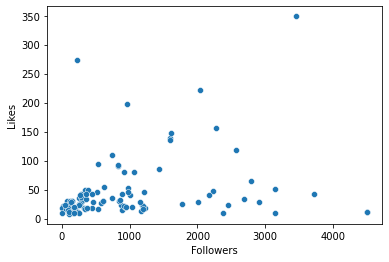

In [91]:
sns.scatterplot(insta['Followers'], insta['Likes'])

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Time since posted', ylabel='Likes'>

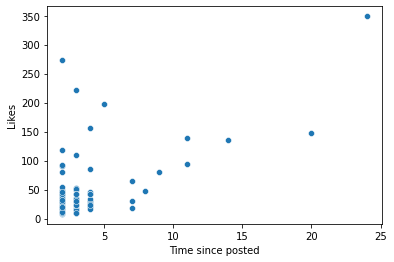

In [92]:
sns.scatterplot(insta['Time since posted'], insta['Likes'])

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Followers', ylabel='Likes'>

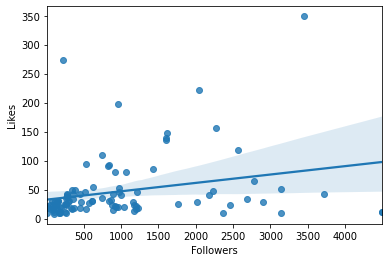

In [93]:
sns.regplot(insta['Followers'], insta['Likes'])

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Followers', ylabel='Density'>

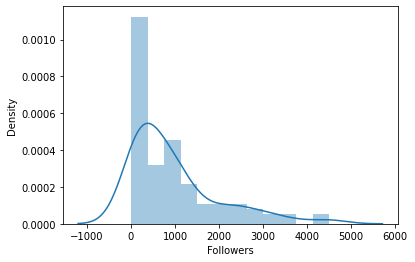

In [94]:
sns.distplot(insta['Followers'])

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time since posted', ylabel='Density'>

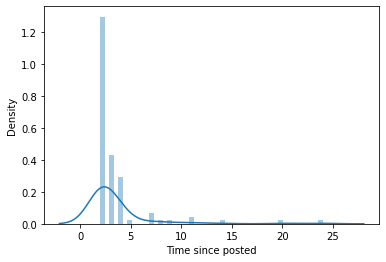

In [96]:
sns.distplot(insta['Time since posted'])

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Likes', ylabel='Density'>

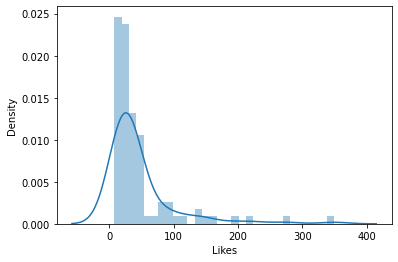

In [97]:
sns.distplot(insta['Likes'])

# #Splitting X and Y-variable

In [98]:
X = insta.drop('Likes', axis=1)
y = insta['Likes']

## #Train-test split

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=79)

# #Building Linear Regression model

In [100]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [101]:
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
lr.score(X_train, y_train)

0.37434405012092775

In [103]:
lr.score(X_test, y_test)

0.3391447160397433

In [104]:
preds = lr.predict(X_test)

## #Find the MSE

In [105]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, preds)

In [106]:
print(MSE)

570.1776783098601


In [107]:
lr.predict([[300,10]])

array([109.86732894])